In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import netCDF4
from global_land_mask import globe
from scipy.optimize import curve_fit
import matplotlib as mpl
import nc_time_axis
mpl.rcParams['figure.dpi']= 300

In [2]:
model2 = '/media/rakshith/Seagate Expansion Drive/Good models/CMCC/*.nc'
cmcc = xr.open_mfdataset(model2)

In [3]:
data = cmcc

In [4]:
jjas = data.time.dt.month.isin(range(6, 10))
clim = data.sel(time=jjas) #ds with only JJAS months
clim1 = clim.groupby('time.year').mean('time')

grid1 = clim1.sel(lat=slice(10,30), lon=slice(70,90))
grid1 = grid1.load()

In [5]:
lon_grid, lat_grid = np.meshgrid(grid1.lon, grid1.lat)
mask = globe.is_land(lat_grid, lon_grid)

In [6]:
Qnet = grid1.rsdt.where(mask>0).mean(dim=['lat', 'lon']) - grid1.rsut.where(mask>0).mean(dim=['lat', 'lon']) - grid1.rlut.where(mask>0).mean(dim=['lat', 'lon'])
Pwat = grid1.prw.where(mask>0).mean(dim=['lat', 'lon'])
PE = 86400*28.96*(grid1.pr.where(mask>0).mean(dim=['lat', 'lon'])-grid1.evspsbl.where(mask>0).mean(dim=['lat', 'lon']))

In [7]:
PTGMS = np.divide(np.multiply(Pwat, Qnet), PE)

In [8]:
TGMS = np.divide(Qnet, PE)

In [12]:
model2 = '/media/rakshith/Seagate Expansion Drive/Good models/CMCC/MSE/ta_Amon_CMCC-CM2-SR5*.nc'
cmcctemp = xr.open_mfdataset(model2)

In [13]:
data = cmcctemp

In [14]:
jjas = data.time.dt.month.isin(range(6, 10))
clim = data.sel(time=jjas) #ds with only JJAS months
clim1 = clim.groupby('time.year').mean('time')

grid1 = clim1.sel(lat=slice(10,30), lon=slice(70,90)).mean('plev')
grid1 = grid1.load()

In [15]:
Tbar = grid1.ta.where(mask>0).mean(dim=['lat', 'lon'])

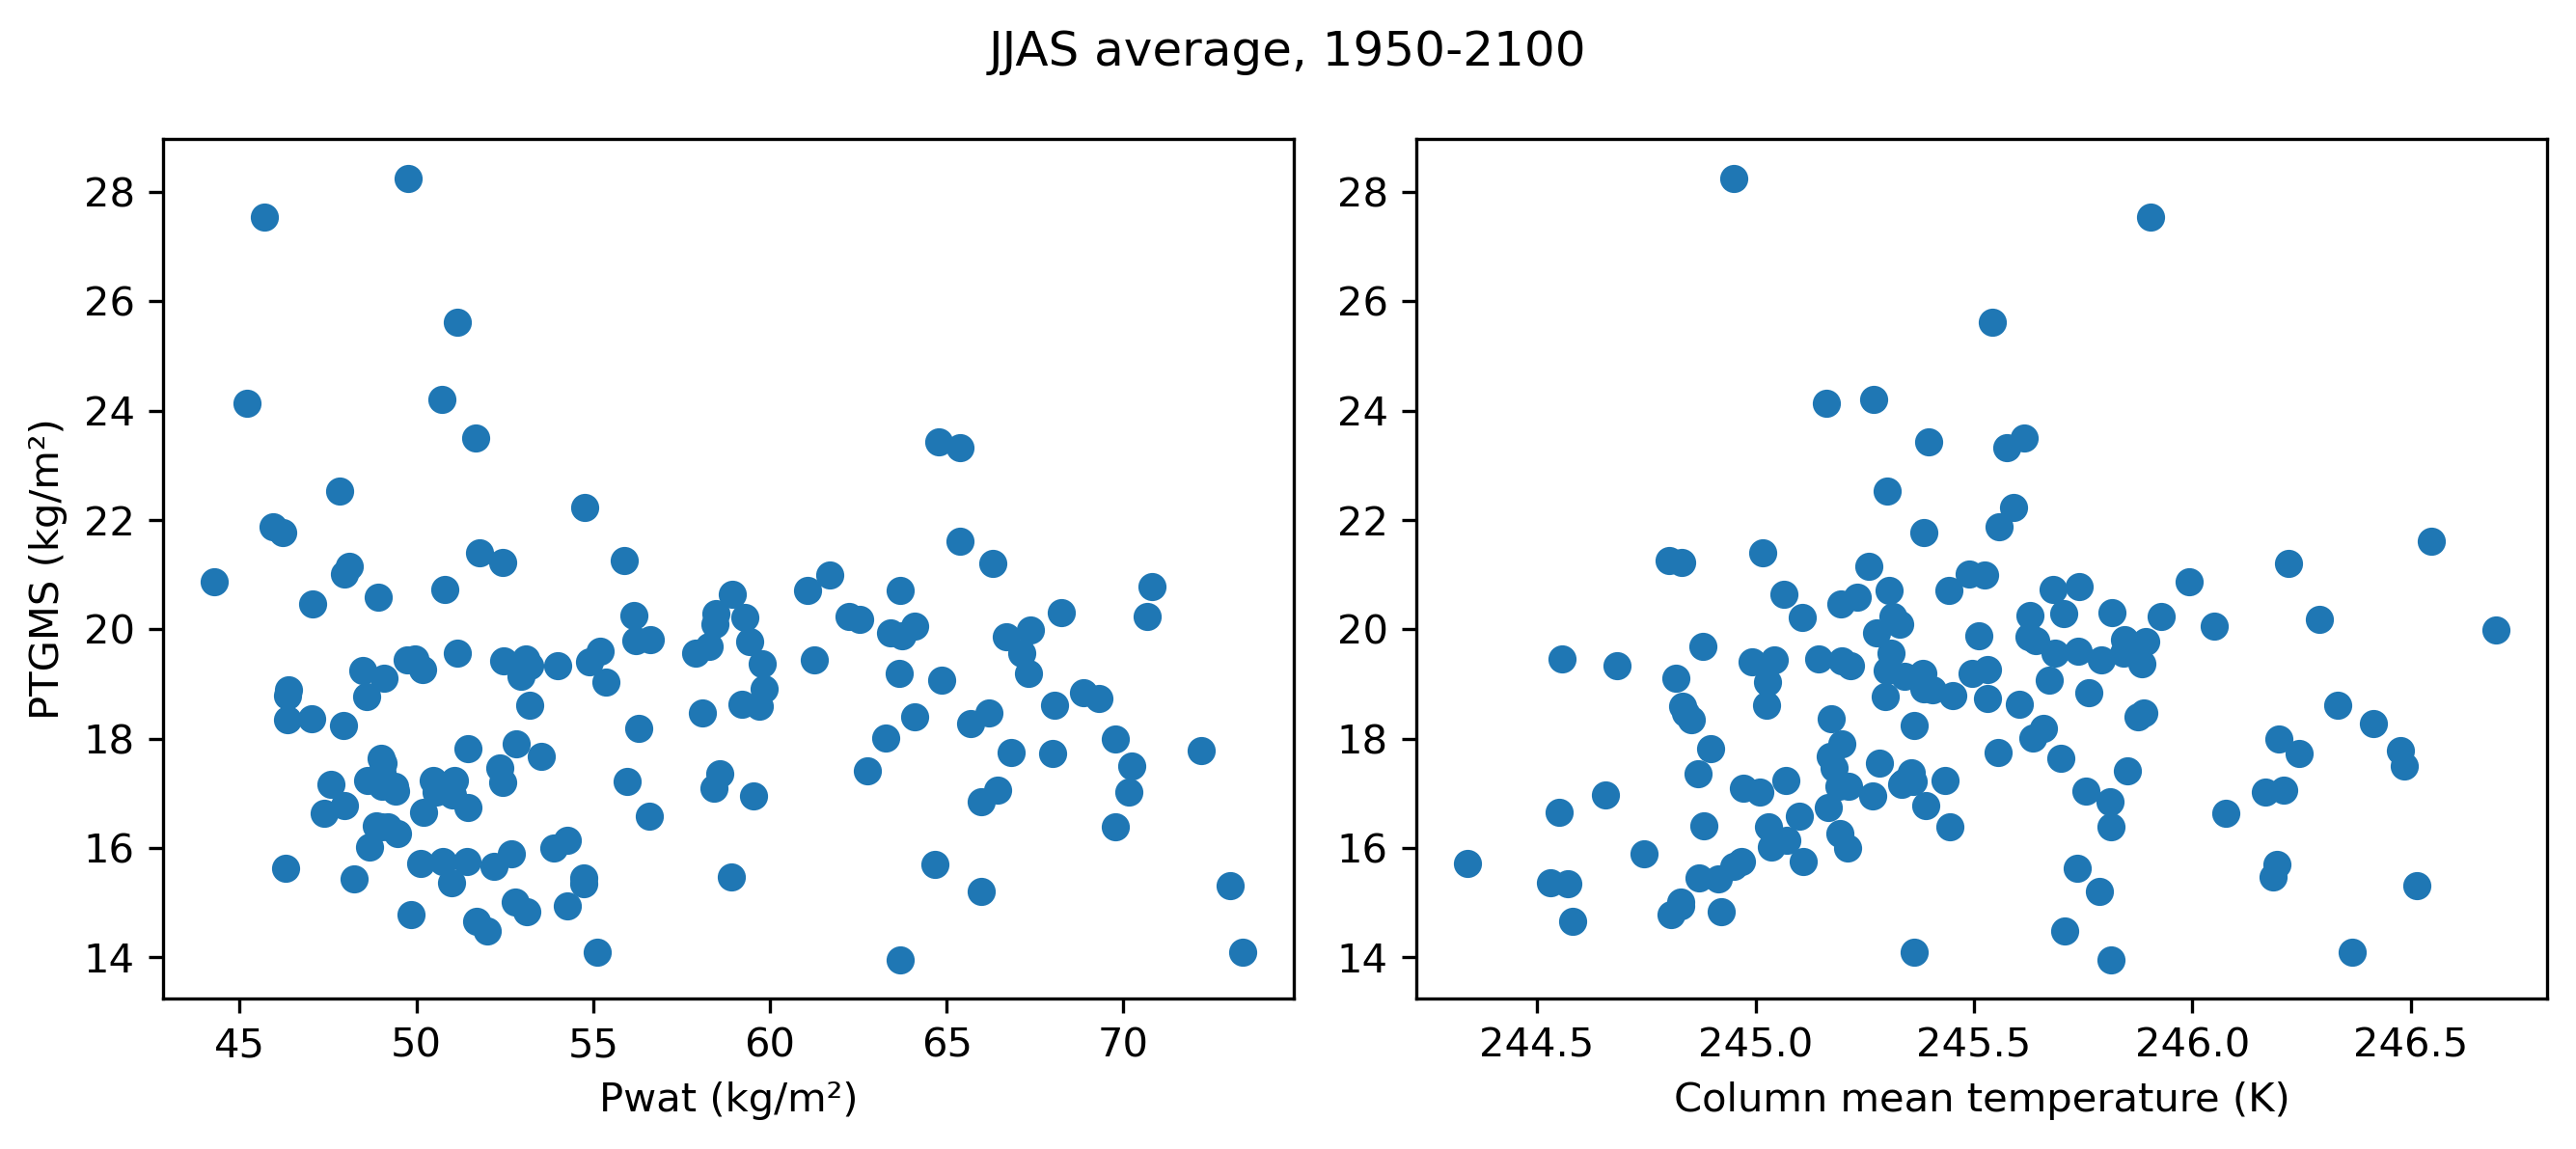

In [27]:
plt.subplot(1,2,1)
plt.scatter(Pwat[100:], PTGMS[100:])
plt.xlabel('Pwat (kg/m\u00b2)')
plt.ylabel('PTGMS (kg/m\u00b2)')

plt.subplot(1,2,2)
plt.scatter(Tbar, PTGMS[100:])
plt.xlabel('Column mean temperature (K)')
plt.suptitle('JJAS average, 1950-2100')
plt.tight_layout()

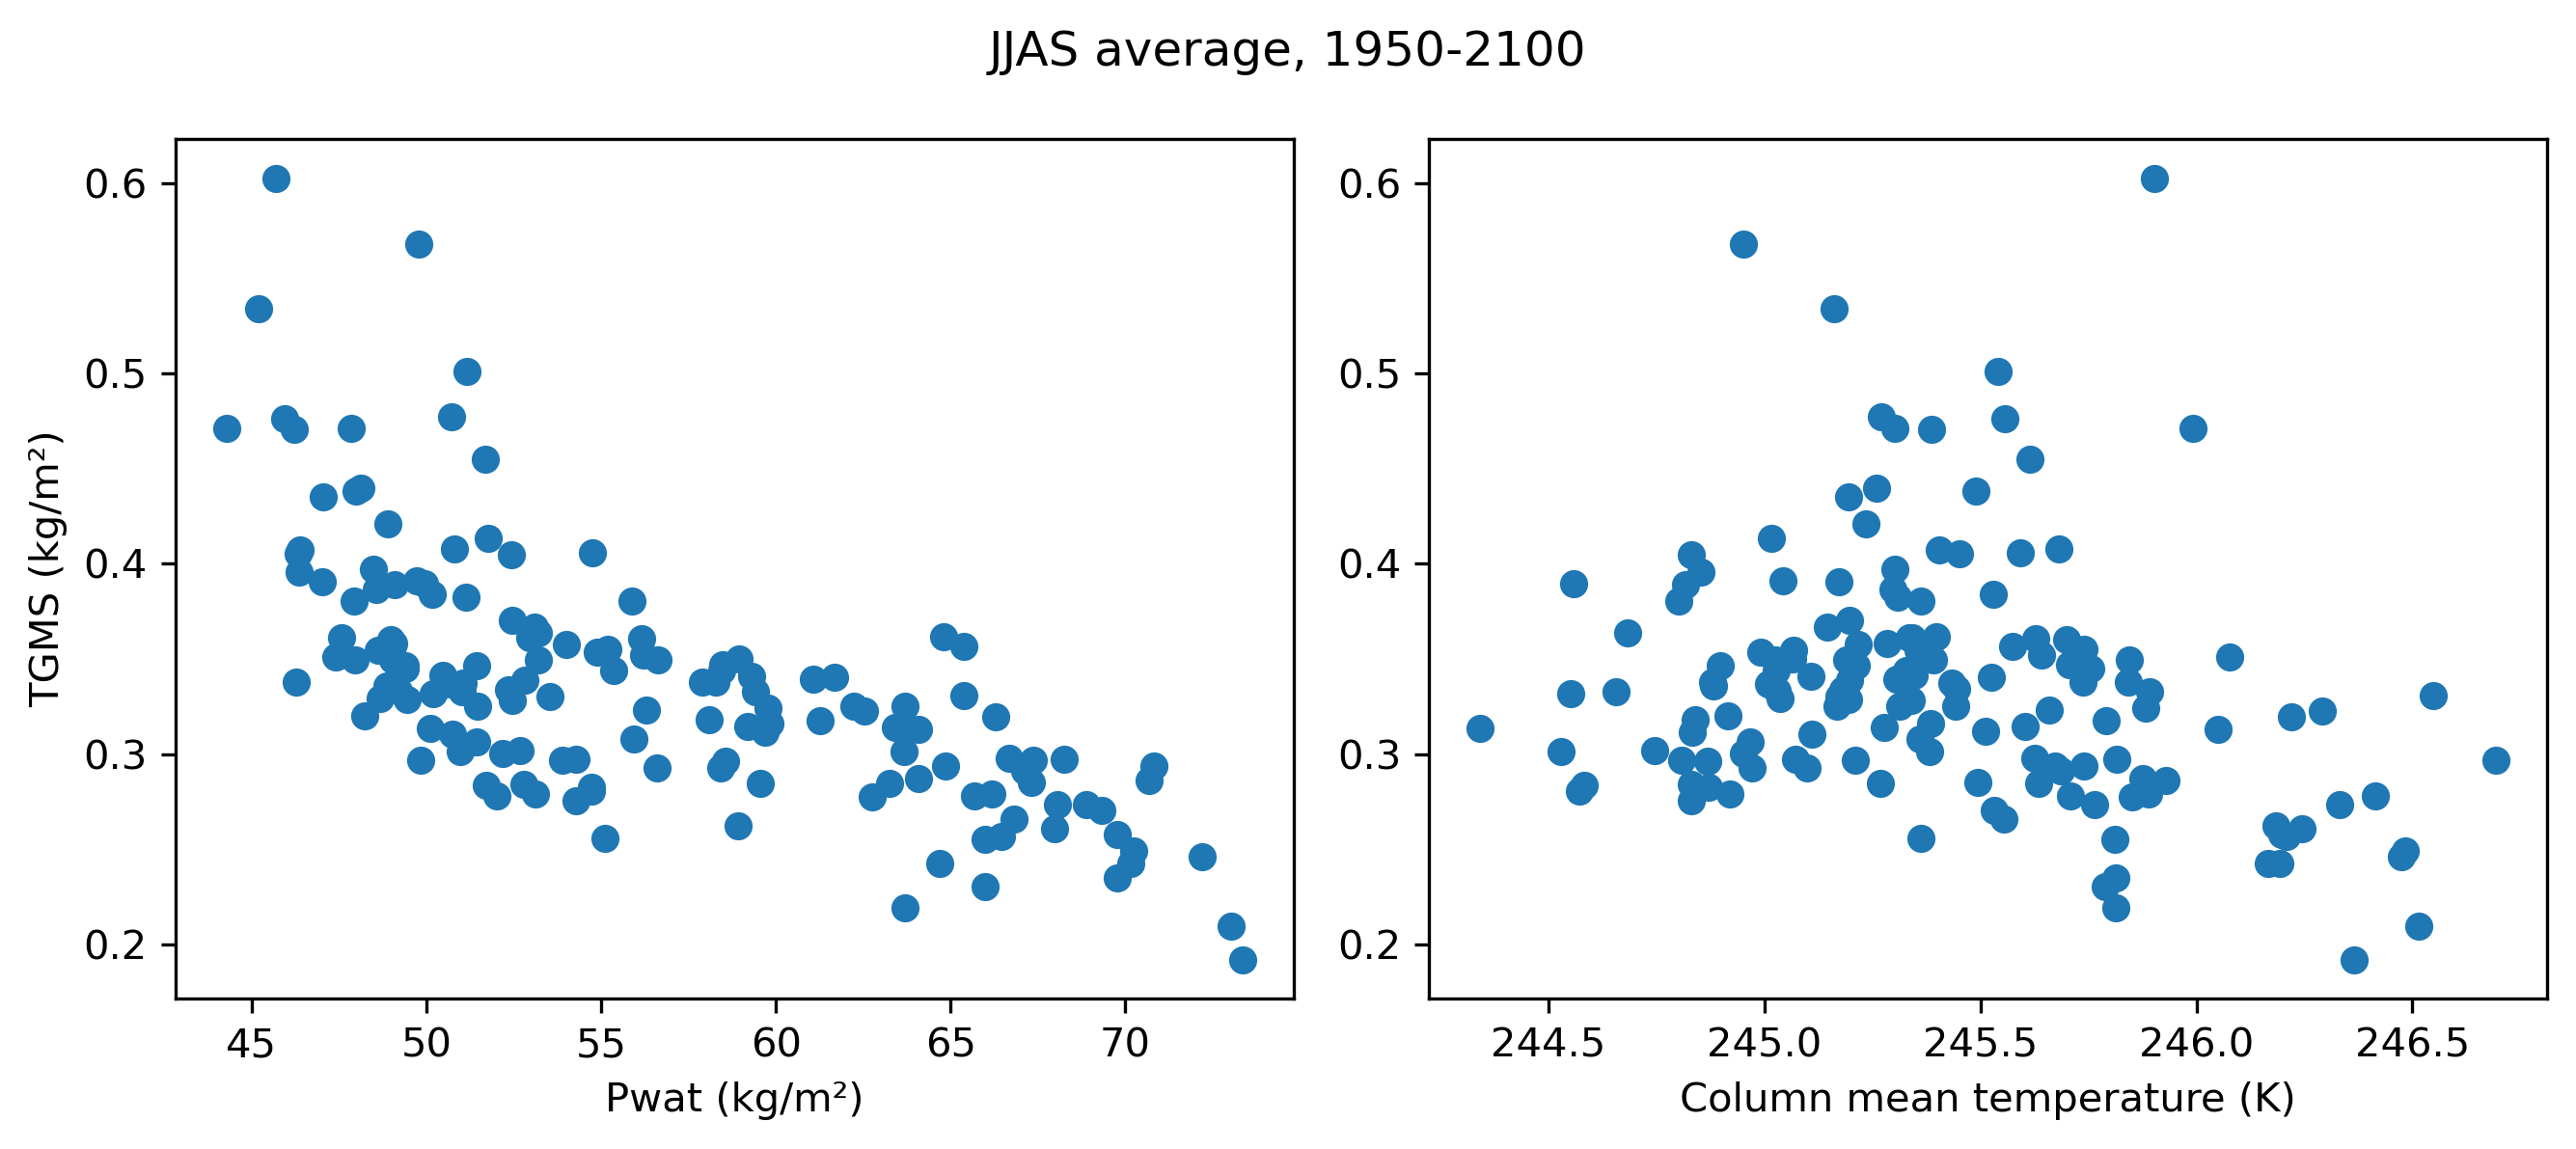

In [28]:
plt.rcParams['figure.figsize'] = [9,4]
plt.subplot(1,2,1)
plt.scatter(Pwat[100:], TGMS[100:])
plt.xlabel('Pwat (kg/m\u00b2)')
plt.ylabel('TGMS (kg/m\u00b2)')

plt.subplot(1,2,2)
plt.scatter(Tbar, TGMS[100:])
plt.xlabel('Column mean temperature (K)')
plt.suptitle('JJAS average, 1950-2100')
plt.tight_layout()